In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

df = pd.read_csv("IMDB_250_Dataset.csv") #read csv

In [2]:
# Data View:
pd.options.display.max_columns = df.shape[1] # Full view of df
df.describe(include='all')

,Rank,Movie_name,URL,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Movie_Length,Genre_1,Genre_2,Genre_3,Genre_4,Release_Date,Story_Summary,Director,Writer_1,Writer_2,Writer_3,Star_1,Star_2,Star_3,Star_4,Star_5,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company
count,249.000000,249,249,249.000000,249.000000,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,226,213,240,249
unique,NaN,249,249,NaN,NaN,81,249,8,106,11,21,18,1,244,249,155,219,183,11,180,228,238,1,1,249,140,210,235,218
top,NaN,Mr. Smith Goes to Washington,https://www.imdb.com/title/tt0113277/,NaN,NaN,86,"1,440,888",Not Rated,2h 10min,Drama,Drama,,,16 April 1988 (Japan),The aging patriarch of an organized crime dyna...,Christopher Nolan,Stanley Kubrick(screenplay),,,Robert De Niro,Matt Damon,Mark Ruffalo,,,insurance investigation|murder disguised as ac...,"$15,000,000(estimated)","$46,808","$46,808",Charles Chaplin Productions
freq,NaN,1,1,NaN,NaN,11,1,96,8,72,83,103,249,2,1,7,4,54,180,6,3,3,249,249,1,8,4,4,5
mean,125.000000,NaN,NaN,1986.461847,8.301205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,72.024301,NaN,NaN,24.914684,0.224952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1921.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63.000000,NaN,NaN,1967.000000,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,125.000000,NaN,NaN,1994.000000,8.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,187.000000,NaN,NaN,2006.000000,8.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head(50)

,Rank,Movie_name,URL,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Movie_Length,Genre_1,Genre_2,Genre_3,Genre_4,Release_Date,Story_Summary,Director,Writer_1,Writer_2,Writer_3,Star_1,Star_2,Star_3,Star_4,Star_5,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company
0,1,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,1994,9.3,80,"2,260,257",PG,2h 22min,Drama,,,,14 October 1994 (USA),Two imprisoned men bond over a number of years...,Frank Darabont,"Stephen King(short story ""Rita Hayworth and Sh...",Frank Darabont(screenplay),,Tim Robbins,Morgan Freeman,Bob Gunton,,,wrongful imprisonment|based on the works of st...,"$25,000,000(estimated)","$28,699,976","$28,815,245",Castle Rock Entertainment
1,2,The Godfather,https://www.imdb.com/title/tt0068646/,1972,9.2,100,"1,559,568",PG,2h 55min,Crime,Drama,,,24 March 1972 (USA),The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Mario Puzo(screenplay by),Francis Ford Coppola(screenplay by),,Marlon Brando,Al Pacino,James Caan,,,mafia|crime family|patriarch|organized crime|r...,"$6,000,000(estimated)","$134,966,411","$246,120,974","Paramount Pictures,Alfran Productions"
2,3,The Godfather: Part II,https://www.imdb.com/title/tt0071562/,1974,9.0,90,"1,089,911",PG,3h 22min,Crime,Drama,,,18 December 1974 (USA),The early life and career of Vito Corleone in ...,Francis Ford Coppola,Francis Ford Coppola(screenplay by),Mario Puzo(screenplay by),,Al Pacino,Robert De Niro,Robert Duvall,,,revenge|corrupt politician|bloody body of chil...,"$13,000,000(estimated)","$47,834,595","$48,035,783","Paramount Pictures,The Coppola Company,America..."
3,4,The Dark Knight,https://www.imdb.com/title/tt0468569/,2008,9.0,84,"2,225,638",PG-13,2h 32min,Action,Crime,Drama,,24 July 2008 (Israel),When the menace known as the Joker wreaks havo...,Christopher Nolan,Jonathan Nolan(screenplay),Christopher Nolan(screenplay),3 more credits»,Christian Bale,Heath Ledger,Aaron Eckhart,,,dc comics|joker|psychopath|clown|criminal mast...,"$185,000,000(estimated)","$535,234,033","$1,099,094,480","Warner Bros.,Legendary Entertainment,Syncopy"
4,5,12 Angry Men,https://www.imdb.com/title/tt0050083/,1957,8.9,96,"662,177",Not Rated,1h 36min,Crime,Drama,,,10 April 1957 (USA),A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Reginald Rose(story),Reginald Rose(screenplay),,Henry Fonda,Lee J. Cobb,Martin Balsam,,,jury|dialogue driven|courtroom|single set prod...,"$350,000(estimated)",NaN,$576,Orion-Nova Productions
5,6,Schindler's List,https://www.imdb.com/title/tt0108052/,1993,8.9,94,"1,174,098",PG,3h 15min,Biography,Drama,History,,4 February 1994 (USA),"In German-occupied Poland during World War II,...",Steven Spielberg,Thomas Keneally(book),Steven Zaillian(screenplay),,Liam Neeson,Ralph Fiennes,Ben Kingsley,,,accountant|champagne|villa|womanizer|soap,"$22,000,000(estimated)","$96,898,818","$322,287,794","Universal Pictures,Amblin Entertainment"
6,7,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/,2003,8.9,94,"1,594,620",PG,3h 21min,Adventure,Drama,Fantasy,,18 December 2003 (Israel),Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,J.R.R. Tolkien(novel),Fran Walsh(screenplay),2 more credits»,Elijah Wood,Viggo Mortensen,Ian McKellen,,,orc|epic|battle|journey|hobbit,"$94,000,000(estimated)","$377,845,905","$1,141,982,172","New Line Cinema,WingNut Films,The Saul Zaentz ..."
7,8,Pulp Fiction,https://www.imdb.com/title/tt0110912/,1994,8.9,94,"1,768,349",18,2h 34min,Crime,Drama,,,November 1994 (Israel),"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,Quentin Tarantino(stories),Roger Avary(stories),,John Travolta,Uma Thurman,Samuel L. Jackson,,,nonlinear timeline|overdose|drug overdose|bond...,"$8,000,000(estimated)","$107,928,762","$222,831,519","Miramax,A Band Apart,Jersey Films"
8,9,"Il buono, il brutto, il cattivo",https://www.imdb.com/title/tt0060196/,1966,8.8,90,"667,396",Not Rated,2h 41min

In [4]:
df.dtypes

Rank                     int64
Movie_name              object
URL                     object
Release_Year             int64
IMDB_Rating            float64
Metascore               object
Reviewer_count          object
Censor_Board_Rating     object
Movie_Length            object
Genre_1                 object
Genre_2                 object
Genre_3                 object
Genre_4                 object
Release_Date            object
Story_Summary           object
Director                object
Writer_1                object
Writer_2                object
Writer_3                object
Star_1                  object
Star_2                  object
Star_3                  object
Star_4                  object
Star_5                  object
Plot_Keywords           object
Budget                  object
Gross_USA               object
Cum_Worldwide_Gross     object
Production_Company      object
dtype: object

In [5]:
# To Do A:
#  Metascore - Clean
#  Reviewer_count - Clean
#  Movie_Length - Conevert to minutes
#  Release_Date - Extract month
#  Plot_Keywords - Tokenize
#  Budget - Clean
#  Gross_USA - Clean
#  Cum_Worldwide_Gross - Clean
#  Drop Irrelevant Columns
#  Remove Duplications

# To Do B:
# Find and Clean Outliers

# Part A

In [6]:
# Metascore - Clean
df['Metascore'] = np.where(df['Metascore'].str.isdigit(), df['Metascore'], np.nan)
df['Metascore'] = df['Metascore'].astype('float64')

In [7]:
# Reviewer_count - Clean
df['Reviewer_count'] = df['Reviewer_count'].str.replace(r'[^\d-]+','')
df['Reviewer_count'] = df['Reviewer_count'].str.replace('$','')
df['Reviewer_count'] = df['Reviewer_count'].str.replace(',','')
df['Reviewer_count']=df['Reviewer_count'].astype('int64')

In [8]:
# Movie_Length - Conevert to minutes
df['Movie_Length'] = df['Movie_Length'].str.replace('h',',')
df['Movie_Length'] = df['Movie_Length'].str.replace('min','')
df[['hours','min']] = df.Movie_Length.str.split(",",expand=True) 
df['min'].mask(df['min'] == '', 0, inplace=True)
df['hours'] = df['hours'].astype('float64')
df['min'] = df['min'].astype('float64')
df['hours'] = df['hours'].apply(lambda x: x*60)
df['Length_in_minutes'] = df['hours'] + df['min']
df.drop('hours', axis=1, inplace=True)
df.drop('min', axis=1, inplace=True)
df.drop('Movie_Length', axis=1, inplace=True)

In [9]:
# Release_Date - Extract month
df[['Release_Date_Clean','Nation']] = df.Release_Date.str.split("(",expand=True)
df['Release_Month'] = pd.DatetimeIndex(df['Release_Date_Clean']).month
df=df.drop(columns=['Nation','Release_Date','Release_Date_Clean'])

In [10]:
# Budget - Clean
df['Budget'] = df['Budget'].str.replace(r'[^\d-]+','')
df['Budget'] = df['Budget'].str.replace('$','')
df['Budget'] = df['Budget'].str.replace(',','')
df['Budget'] = df['Budget'].astype('float64')

In [11]:
# Gross_USA - Clean
df['Gross_USA'] = df['Gross_USA'].str.replace(r'[^\d-]+','')
df['Gross_USA'] = df['Gross_USA'].str.replace('$','')
df['Gross_USA'] = df['Gross_USA'].str.replace(',','')
df['Gross_USA'] = df['Gross_USA'].astype('float64')

In [12]:
# Cum_Worldwide_Gross - Clean
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].str.replace(r'[^\d-]+','')
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].str.replace('$','')
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].str.replace(',','')
df['Cum_Worldwide_Gross'] = df['Cum_Worldwide_Gross'].astype('float64')

In [13]:
# Drop Irrelevant Columns
df=df.drop(columns=['Genre_4','Writer_3','Star_4','Star_5','URL','Rank','Story_Summary'])

In [14]:
# Duplications:
df=df.drop_duplicates(subset=["Movie_name","Release_Year"])

# Part B

In [15]:
# Categorial data describe
df.describe(include = ['O'])

,Movie_name,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Production_Company
count,249,249,249,249,249,249,249,249,249,249,249,249,249
unique,249,8,11,21,18,155,219,183,180,228,238,249,218
top,Mr. Smith Goes to Washington,Not Rated,Drama,Drama,,Christopher Nolan,Stanley Kubrick(screenplay),,Robert De Niro,Matt Damon,Mark Ruffalo,insurance investigation|murder disguised as ac...,Charles Chaplin Productions
freq,1,96,72,83,103,7,4,54,6,3,3,1,5


In [16]:
# Numeric data describe
df.describe(include = [np.number])

,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Budget,Gross_USA,Cum_Worldwide_Gross,Length_in_minutes,Release_Month
count,249.000000,249.000000,213.000000,2.490000e+02,2.260000e+02,2.130000e+02,2.400000e+02,248.000000,249.000000
mean,1986.461847,8.301205,82.544601,5.258801e+05,9.639125e+07,9.089552e+07,1.988411e+08,130.165323,6.662651
std,24.914684,0.224952,11.005750,4.479363e+05,6.848516e+08,1.301631e+08,3.395892e+08,32.299222,3.789663
min,1921.000000,8.000000,55.000000,2.552100e+04,1.330000e+05,5.090000e+02,5.760000e+02,67.000000,1.000000
25%,1967.000000,8.100000,75.000000,1.549220e+05,3.000000e+06,4.845631e+06,4.382172e+06,108.000000,3.000000
50%,1994.000000,8.200000,84.000000,3.823430e+05,1.500000e+07,3.322550e+07,4.902814e+07,126.500000,7.000000
75%,2006.000000,8.400000,90.000000,7.858050e+05,4.375000e+07,1.307429e+08,2.655782e+08,146.000000,10.000000
max,2019.000000,9.300000,100.000000,2.260257e+06,1.000000e+10,8.583730e+08,2.797801e+09,321.000000,12.000000


D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


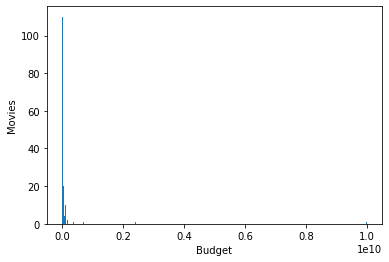

In [17]:
plt.hist(df['Budget'], bins = 'auto') # Budget Plot
plt.xlabel("Budget")
plt.ylabel("Movies")
plt.show()

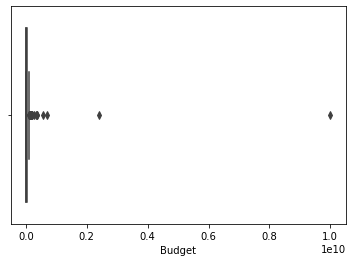

In [18]:
sns.boxplot(df.Budget)

In [19]:
print("Budget too high: ",df['Budget'][df['Budget']>4e8].count()) # Budget Outliers
print("Budget too low: ",df['Budget'][df['Budget']<1e6].count()) 

df.loc[df.Budget > 4e8, 'Budget']= np.nan
df.loc[df.Budget < 1e6, 'Budget']= np.nan

Budget too high:  4
Budget too low:  22


D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


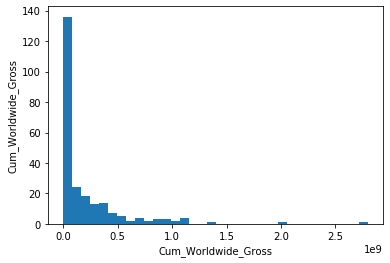

In [20]:
plt.hist(df['Cum_Worldwide_Gross'], bins = 'auto') # Cum_Worldwide_Gross Plot
plt.xlabel("Cum_Worldwide_Gross")
plt.ylabel("Cum_Worldwide_Gross")
plt.show()

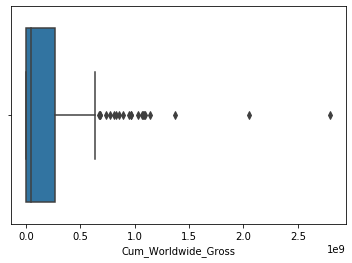

In [21]:
sns.boxplot(df.Cum_Worldwide_Gross)

In [22]:
print("Cum_Worldwide_Gross too high: ",df['Cum_Worldwide_Gross'][df['Cum_Worldwide_Gross']>2.8e9].count()) # Cum_Worldwide_Gross Outliers

df.loc[df.Cum_Worldwide_Gross >2.8e9, 'Cum_Worldwide_Gross']= np.nan

Cum_Worldwide_Gross too high:  0


D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Elad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


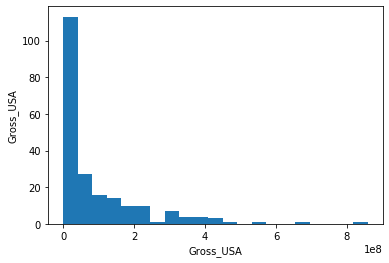

In [23]:
plt.hist(df['Gross_USA'], bins = 'auto') # Gross_USA Plot
plt.xlabel("Gross_USA")
plt.ylabel("Gross_USA")
plt.show()

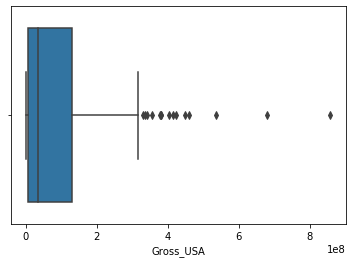

In [24]:
sns.boxplot(df.Gross_USA)

In [25]:
print("Gross_USA too high: ",df['Gross_USA'][df['Gross_USA']>9e8].count()) # Gross_USA Outliers
df.loc[df.Gross_USA >9e8, 'Gross_USA']= np.nan

Gross_USA too high:  0


In [26]:
# Removing rows with nan
df=df.dropna(subset=["IMDB_Rating","Reviewer_count","Metascore","Budget","Gross_USA","Cum_Worldwide_Gross","Length_in_minutes","Release_Month"],how='any',axis='rows')

In [27]:
df.describe(include='all')

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
count,174,174.000000,174.000000,174.000000,1.740000e+02,174,174,174,174,174,174,174,174,174,174,174,1.740000e+02,1.740000e+02,1.740000e+02,174,174.000000,174.000000
unique,174,NaN,NaN,NaN,NaN,8,10,20,16,112,155,130,129,157,165,174,NaN,NaN,NaN,157,NaN,NaN
top,Fight Club,NaN,NaN,NaN,NaN,R,Drama,Drama,,Christopher Nolan,Quentin Tarantino,,Robert De Niro,Matt Damon,Joe Pesci,based on true story|car racing|motor sports|ra...,NaN,NaN,NaN,"Pixar Animation Studios,Walt Disney Pictures",NaN,NaN
freq,1,NaN,NaN,NaN,NaN,52,45,58,67,7,4,36,5,3,3,1,NaN,NaN,NaN,4,NaN,NaN
mean,NaN,1993.545977,8.321839,81.477011,6.821607e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.462333e+07,1.098616e+08,2.674889e+08,NaN,132.275862,6.568966
std,NaN,19.417698,0.245150,10.856236,4.443529e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.332007e+07,1.367671e+08,3.758386e+08,NaN,28.997385,3.754514
min,NaN,1927.000000,8.000000,55.000000,5.049500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+06,1.256200e+04,1.881600e+04,NaN,80.000000,1.000000
25%,NaN,1984.000000,8.100000,74.250000,3.289612e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+06,1.687692e+07,2.953866e+07,NaN,115.000000,3.000000
50%,NaN,1998.000000,8.300000,82.500000,6.414940e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.900000e+07,5.322982e+07,1.210996e+08,NaN,129.000000,7.000000
75%,NaN,2008.000000,8.500000,90.000000,9.093948e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.725000e+07,1.619110e+08,3.733707e+08,NaN,148.750000,10.000000


In [28]:
df.to_csv('250_Dataset_Cleaned.csv', index=False)